Testing
Number of features:  203965
Accuracy:  0.7391304347826086
Confusion matrix, without normalization


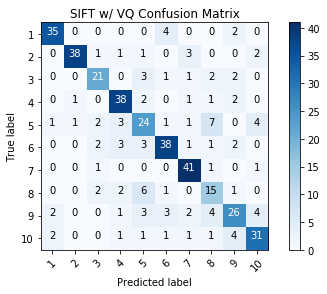

In [3]:
%matplotlib notebook
# SIFT keypoints, descriptors, VQ and SVM
from DataSet import DataSet
import matplotlib.pyplot as plt
import cv2
import numpy as np
from multiprocessing import Pool
import os
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import image_operations as img_op

ds = DataSet()
data_train = ds.butterfly_train
data_test = ds.butterfly_test

mbk = MiniBatchKMeans(n_clusters=200)


def vector_quantization_train(features):
    sift_features = np.empty((0, 128))
    for f, label in features:
        mbk.partial_fit(f)
    return vector_quantization(features)


def vector_quantization(features):
    X = []
    y = []
    count = 0
    for f, label in features:
        count += len(f)
        vq = mbk.predict(f)
        vals, bins, _ = plt.hist(vq, bins=200, histtype='step')
        X.append(vals)
        y.append(label)
    # plt.show()
    plt.close()
    return X, y, count


def get_features(args):
    i = args[0]
    data = args[1]
    img = ds.get_image(data[i][1])
    label = data[i][0]
    sift = cv2.xfeatures2d.SIFT_create(500)
    kp, des = sift.detectAndCompute(img, None)
    return [des, label]


pool = Pool(os.cpu_count())
try:
    pickle_rw = open("clf_sift.pickle", "rb")
    models = pickle.load(pickle_rw)
    clf = models[0]
    mbk = models[1]
except:
    print("Training")
    features = pool.map(get_features, [(i, data_train)
                                       for i in range(len(data_train))])

    X, y, count = vector_quantization_train(features)
    print("Number of features: ", count)
    clf = LinearSVC()
    clf.fit(X, y)
    # save pickle the model
    pickle_rw = open("clf_sift.pickle", "wb")
    pickle.dump([clf, mbk], pickle_rw)
    pickle_rw.close()

print("Testing")
features = pool.map(get_features, [(i, data_test)
                                   for i in range(len(data_test))])
X, y, count = vector_quantization(features)
print("Number of features: ", count)
predictions = clf.predict(X)
accuracy = np.count_nonzero(np.where(predictions == y)[
                            0]) / predictions.shape[0]
print("Accuracy: ", accuracy)
cm = confusion_matrix(y, predictions)
plt.figure()
img_op.plot_confusion_matrix(cm, classes=range(
    1, 11), title='SIFT w/ VQ Confusion Matrix')


In [ ]:
Normalization gave worse accuracy (50s instead of 70s)
picking the best 500 features boosted accuracy slightly (2-3% points)

In [2]:
# SIFT keypoints, LBP, SVM
%matplotlib notebook
from DataSet import DataSet
import matplotlib.pyplot as plt
import cv2
import image_operations as img_op
import numpy as np
from multiprocessing import Pool
import os
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

ds = DataSet()
data_train = ds.butterfly_train
data_test = ds.butterfly_test

lbp_features = np.empty((0))


def make_image_histogram(kps, lbp):
    kpx = np.asarray([np.around(kp.pt[0]) for kp in kps], dtype=np.int32)
    kpy = np.asarray([np.around(kp.pt[1]) for kp in kps], dtype=np.int32)
    vector = lbp[kpy, kpx]
    vals, bins, _ = plt.hist(vector, bins=256, histtype='step')
    return vals


def get_features(args):
    i = args[0]
    data = args[1]
    img = ds.get_image(data[i][1])
    label = data[i][0]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lbp = img_op.LBP(gray)
    sift = cv2.xfeatures2d.SIFT_create(500)
    kp, des = sift.detectAndCompute(gray, None)
    return [make_image_histogram(kp, lbp), label]


def clf_format_data(features):
    X = []
    y = []
    for f, label in features:
        X.append(f)
        y.append(label)
    return X, y


print("Training")
# get_features([0, data_train])
pool = Pool(os.cpu_count())
features = pool.map(get_features, [(i, data_train)
                                   for i in range(len(data_train))])
X, y = clf_format_data(features)
clf = LinearSVC()
clf.fit(X, y)

print("Testing")
pool = Pool(os.cpu_count())
features = pool.map(get_features, [(i, data_test)
                                   for i in range(len(data_test))])
X, y = clf_format_data(features)
predictions = clf.predict(X)
accuracy = np.count_nonzero(np.where(predictions == y)[
                            0]) / predictions.shape[0]
print("Accuracy: ", accuracy)
cm = confusion_matrix(y, predictions)
plt.figure()
img_op.plot_confusion_matrix(cm, classes=range(
    1, 11), title='SIFT w/ VQ Confusion Matrix')

Training
Testing
Accuracy:  0.24396135265700483
Confusion matrix, without normalization


In [1]:
# Dense keypoints, LBP, SVM
import dense

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
# SIFT keypoints, LBP, spacial pyramid, SVM
import sift_lbp_spacial

In [1]:
# Detection using SIFT, VQ and SVM
import detection

Testing


Process ForkPoolWorker-6:
Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Process ForkPoolWorker-4:
Process ForkPoolWorker-5:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/cramsted/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/cramsted/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/cramsted/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/cramsted/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/cramsted/anaconda3/lib/python3.6/multi

Testing


KeyboardInterrupt: 